<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Load-datasets" data-toc-modified-id="Load-datasets-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load datasets</a></span><ul class="toc-item"><li><span><a href="#Corpus" data-toc-modified-id="Corpus-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Corpus</a></span></li><li><span><a href="#Replacement-table" data-toc-modified-id="Replacement-table-0.2.2"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Replacement table</a></span></li></ul></li></ul></li><li><span><a href="#Convert" data-toc-modified-id="Convert-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convert</a></span></li><li><span><a href="#Stats---Audit" data-toc-modified-id="Stats---Audit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stats - Audit</a></span></li></ul></div>

## Packages

In [91]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load datasets

### Corpus

In [92]:
from google.colab import files
files.upload()

file_name = "Swadesh_Timor_FonologiaI_teste.csv"
column_name = "SourceWord"

word_df = pd.read_csv(file_name, keep_default_na=False)
word_df = word_df[[column_name]]
word_df.columns = ["word"]

# to lower
# word_df["word"] = word_df["word"].str.lower()

word_df

Saving Swadesh_Timor_FonologiaI_teste.csv to Swadesh_Timor_FonologiaI_teste (7).csv


,word
0,teŋ
1,boŋ
2,ˈuŋwa
3,ˈuŋwa
4,alguˈdaŋ
...,...
125,ri
126,ˈkume
127,ˈkume
128,ˈsega


### Replacement table

In [93]:
from google.colab import files
files.upload()

file_name = "IPA_to_CV.csv"

replace_rules = pd.read_csv(file_name, keep_default_na=False)

replace_rules

Saving IPA_to_CV.csv to IPA_to_CV (8).csv


,IPA,CV,Lenght
0,n̠̤d̠̤ʒ,C,7
1,ŋ̥ǂ͓ˡxˀ,C,7
2,n̪t̪s̪ʰ,C,7
3,n̪d̪z̪,C,6
4,t̪s̪ʷʰ,C,6
...,...,...,...
1957,ɘ,V,1
1958,ɜ,V,1
1959,ɵ,V,1
1960,ʏ,V,1


In [94]:
replace_rules = replace_rules[["IPA","CV"]]

replace_rules.columns = ["s_string","t_string"]
replace_rules

replace_rules[0:5]

,s_string,t_string
0,n̠̤d̠̤ʒ,C
1,ŋ̥ǂ͓ˡxˀ,C
2,n̪t̪s̪ʰ,C
3,n̪d̪z̪,C
4,t̪s̪ʷʰ,C


# Convert

In [95]:
word_df['new_word'] = word_df['word']

for row in replace_rules.itertuples():
    word_df['new_word'] = word_df['new_word'].str.replace(row.s_string, row.t_string, regex=False)
    
word_df

,word,new_word
0,teŋ,CVC
1,boŋ,CVC
2,ˈuŋwa,ˈVCCV
3,ˈuŋwa,ˈVCCV
4,alguˈdaŋ,VCgVˈCVC
...,...,...
125,ri,CV
126,ˈkume,ˈCVCV
127,ˈkume,ˈCVCV
128,ˈsega,ˈCVgV


# Stats - Audit

In [96]:
word_list = list(word_df["new_word"])
word_list[0:5]

['CVC', 'CVC', 'ˈVCCV', 'ˈVCCV', 'VCgVˈCVC']

In [97]:
counts = Counter(word_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["string", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,string,count
0,ˈCVCV,40
1,ˈVCV,10
2,ˈCVgV,7
3,CV,7
4,CVC,6
5,CVˈCVCV,6
6,CVCˈCVCV,6
7,ˈCCVCV,5
8,ˈCVCVˈCVCV,4
9,VˈCVCV,4


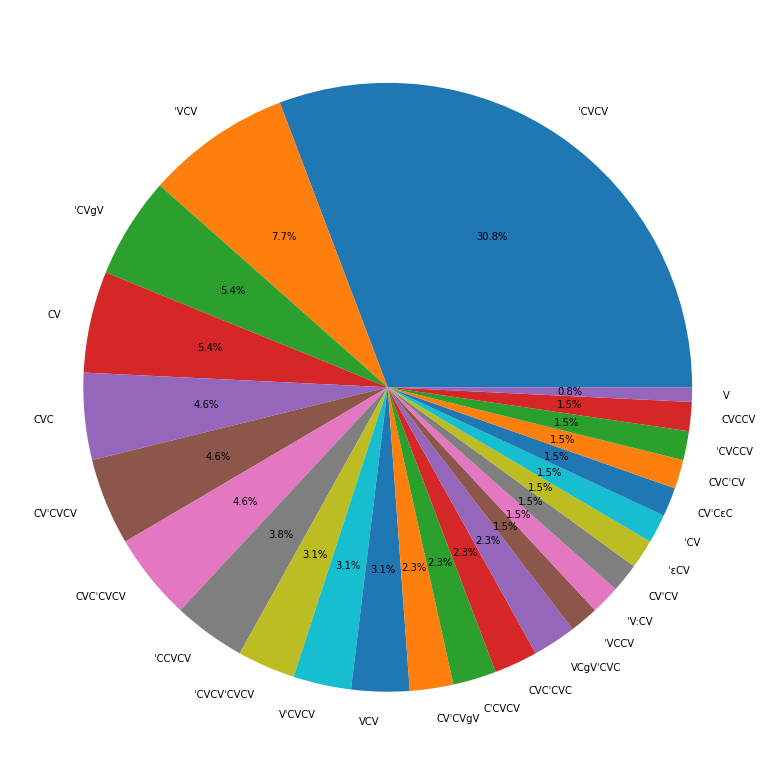

In [98]:
df1 = df.set_index('string')
plot = df1.plot.pie(y='count', ylabel='',autopct='%1.1f%%', legend=False, figsize=(14, 14))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


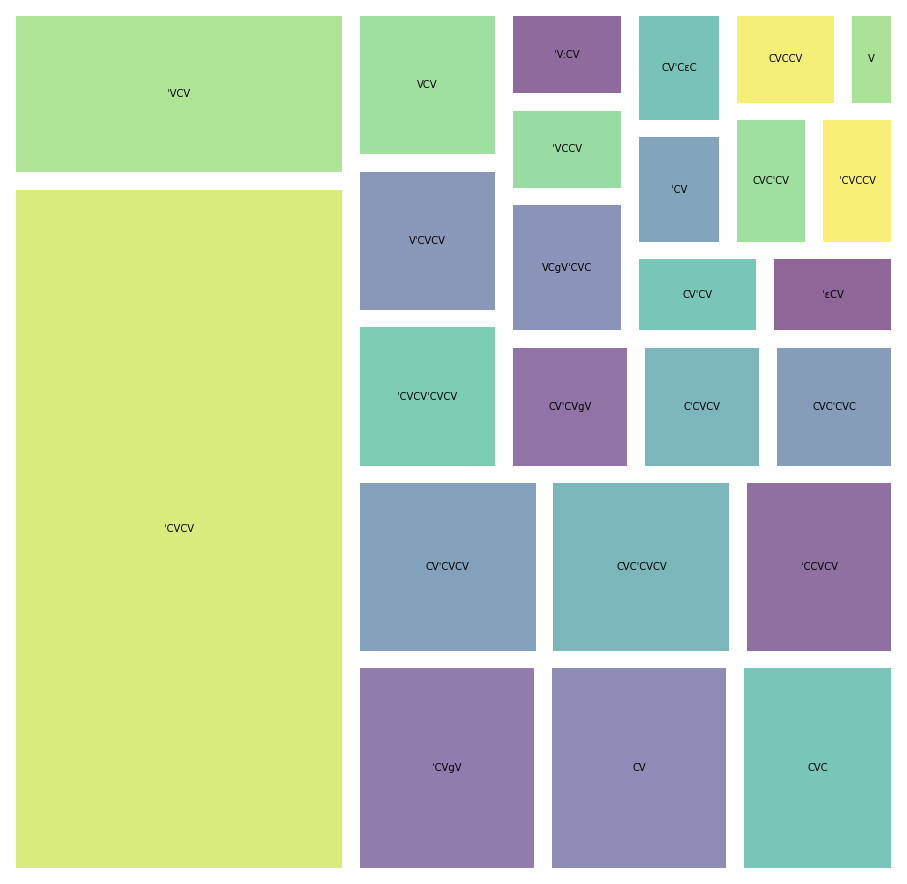

In [99]:
labels = list(df["string"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

In [100]:
word_list = [" ".join(list(str(i))) for i in word_list]
word_list[0:5]

['C V C', 'C V C', 'ˈ V C C V', 'ˈ V C C V', 'V C g V ˈ C V C']

In [101]:
word_list_split = [i.split(" ") for i in word_list]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
word_list_split[0:5] 

['C', 'V', 'C', 'C', 'V']

In [102]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["char", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,char,count
0,C,275
1,V,270
2,ˈ,114
3,g,13
4,ε,4
5,:,2


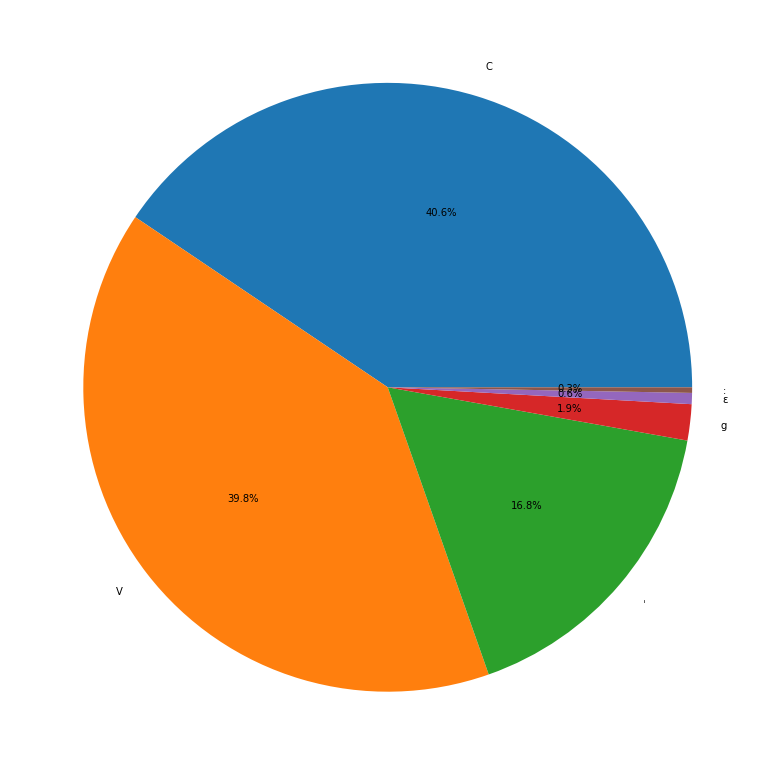

In [103]:
df1 = df.set_index('char')
plot = df1.plot.pie(y='count', ylabel='',autopct='%1.1f%%', legend=False, figsize=(14, 14))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


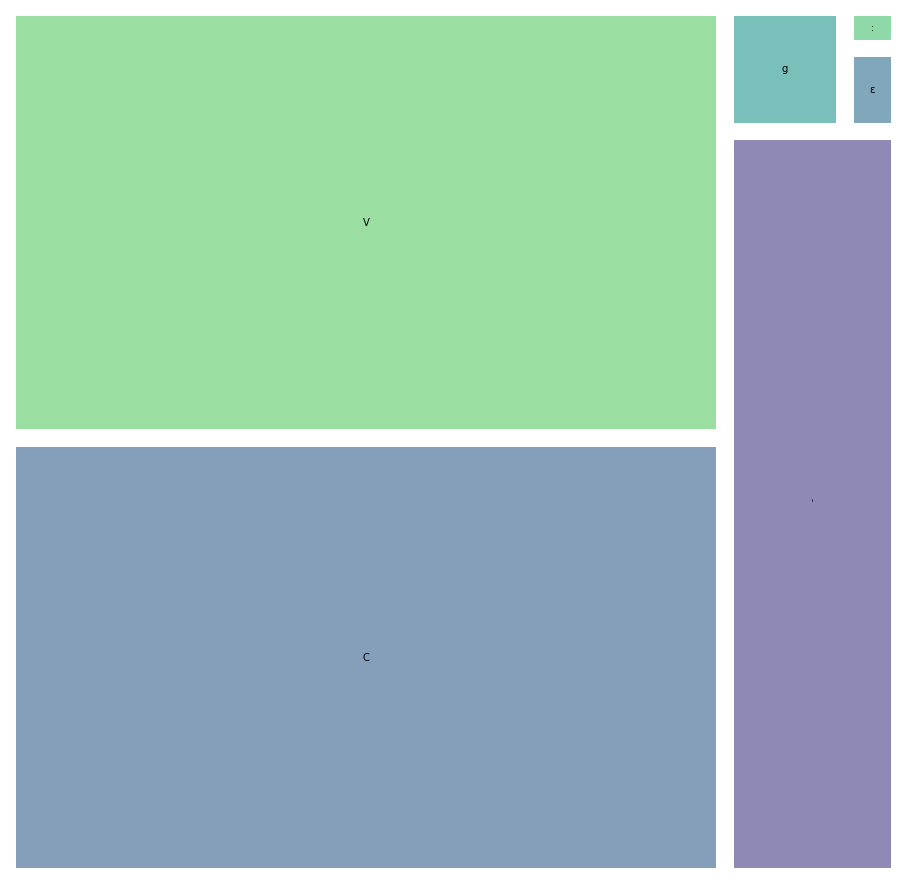

In [104]:
labels = list(df["char"])
sizes = list(df["count"])
squarify.plot(sizes, label = labels, alpha=0.6, pad=True)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
plt.axis('off')
plt.show()

In [105]:
file_name = "replacement_table.csv"

word_df.to_csv(file_name, index = False, header = True)

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>